# Deep Neural Network using Keras

In [23]:
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import layers

import random
import numpy as np

In [24]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
tf.random.set_seed(42)  # sets the graph-level random seed

## Dataset

In [25]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

Text(0.5, 1.0, 'Ground Truth (Test): 7')

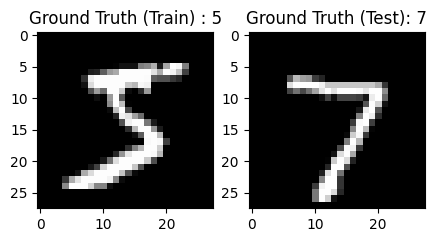

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(Xtrain[0,:,:], cmap='gray')
plt.title("Ground Truth (Train) : {}".format(Ytrain[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(Xtest[0,:,:], cmap='gray')
plt.title("Ground Truth (Test): {}".format(Ytest[0]))

In [27]:
# size of the datsets

print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [28]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  24 209 254 254 254
 171   0   0   0   0   0   0   0   0   0]
Xtest 
 [  0   0   0   0   0   0   0   0 194 254 103   0   0   0   0   0   0   0
   0   0 150 254 213   0   0   0   0   0]
Ytrain 
 3
Ytest 
 0


In [29]:
# Normalize the data
# 60000 input images are in the train set.
# 10000 input images are in the test set.

Xtrain = Xtrain.reshape((60000, 28*28))    # reshape the input set to size 28*28. 
Xtrain = Xtrain.astype('float32')/255      # normalize to grayscale; set datatype as float32

Xtest = Xtest.reshape((10000, 28*28))      # reshape the input set to size 28*28. 
Xtest = Xtest.astype('float32')/255        # normalize to grayscale; set datatype as float32

Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest)

In [30]:
# print a sample data

print('Xtrain \n', Xtrain[10,10])
print('Xtest \n', Xtest[10,10])
print('Ytrain \n', Ytrain[10,])
print('Ytest \n', Ytest[10,])

Xtrain 
 0.0
Xtest 
 0.0
Ytrain 
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Ytest 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## DNN Model

Using Keras, create the DNN or Sequential Model

In [31]:
# Create a model object

dnnModel = models.Sequential()

Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [32]:
# Layer 1 = input layer
# specify the input size in the first layer.

dnnModel.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))

# Layer 2 = hidden layer 
dnnModel.add(layers.Dense(60, activation='relu'))

# Layer 3 = hidden layer 
dnnModel.add(layers.Dense(30, activation='relu'))


# Layer 4 = output layer
dnnModel.add(layers.Dense(10, activation='softmax'))

dnnModel.summary()

c:\Python3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
dnnModel_adam = models.Sequential()
dnnModel_adam.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))
dnnModel_adam.add(layers.Dense(60, activation='relu'))
dnnModel_adam.add(layers.Dense(30, activation='relu'))
dnnModel_adam.add(layers.Dense(10, activation='softmax'))
dnnModel_adam.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
dnnModel_rmsprop = models.Sequential()
dnnModel_rmsprop.add(layers.Dense(50, activation='relu', input_shape= (28*28,)))
dnnModel_rmsprop.add(layers.Dense(60, activation='relu'))
dnnModel_rmsprop.add(layers.Dense(30, activation='relu'))
dnnModel_rmsprop.add(layers.Dense(10, activation='softmax'))
dnnModel_rmsprop.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 60)             │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,450 (173.63 KB)

 Trainable params: 44,450 (173.63 KB)

 Non-trainable params: 0 (0.00 B)

## Regularization and Optimizations of DNN

In [35]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 
        
dnnModel.compile( optimizer = 'sgd', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnnModel_adam.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )
dnnModel_rmsprop.compile( optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'] )

## Train the Model

In [36]:
# train the model

h_sgd  = dnnModel.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)
h_adam  = dnnModel_adam.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)
h_rms  = dnnModel_rmsprop.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)


Epoch 1/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3466 - loss: 1.9892 - val_accuracy: 0.8655 - val_loss: 0.5466
Epoch 2/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8531 - loss: 0.5383 - val_accuracy: 0.9150 - val_loss: 0.3128
Epoch 3/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8921 - loss: 0.3771 - val_accuracy: 0.9290 - val_loss: 0.2628
Epoch 4/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9059 - loss: 0.3222 - val_accuracy: 0.9368 - val_loss: 0.2338
Epoch 5/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9159 - loss: 0.2864 - val_accuracy: 0.9432 - val_loss: 0.2121
Epoch 6/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9231 - loss: 0.2590 - val_accuracy: 0.9487 - val_loss: 0.1941
Epoch 7/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9297 - loss: 0.2365 - val_accuracy: 0.9502 - val_loss: 0.1799
Epoch 8/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9353 - loss: 0.2177 - val_accuracy: 0

In [37]:
#print('Final training loss \t', h.history['loss'][-1])
print('SGD Final training accuracy ', h_sgd.history['accuracy'][-1])
print('Adam Final training accuracy ', h_adam.history['accuracy'][-1])
print('RMSProp Final training accuracy ', h_rms.history['accuracy'][-1])

SGD Final training accuracy  0.9737036824226379
Adam Final training accuracy  0.9948148131370544
RMSProp Final training accuracy  0.9959629774093628


## Testing the Model

In [38]:
# testing the model

testLoss_sgd, testAccuracy_sgd = dnnModel.evaluate( Xtest, Ytest)
testLoss_adam, testAccuracy_adam = dnnModel_adam.evaluate( Xtest, Ytest)
testLoss_rms, testAccuracy_rms = dnnModel_rmsprop.evaluate( Xtest, Ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9596 - loss: 0.1309
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9649 - loss: 0.1932
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9633 - loss: 0.2710


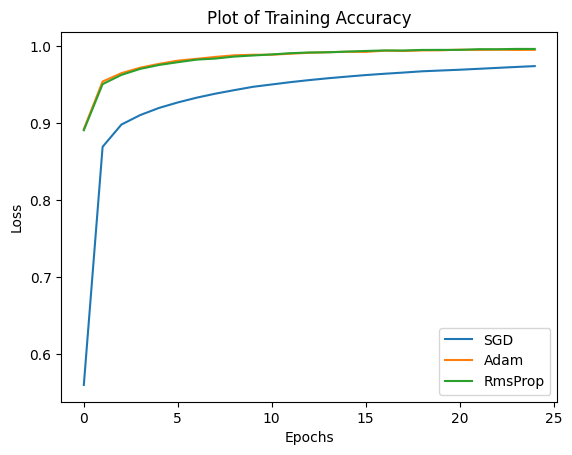

In [39]:
# plot the training accuracy

plt.plot(h_sgd.history['accuracy'], label='SGD')
plt.plot(h_adam.history['accuracy'], label='Adam')
plt.plot(h_rms.history['accuracy'], label='RmsProp')
#plt.plot(h.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

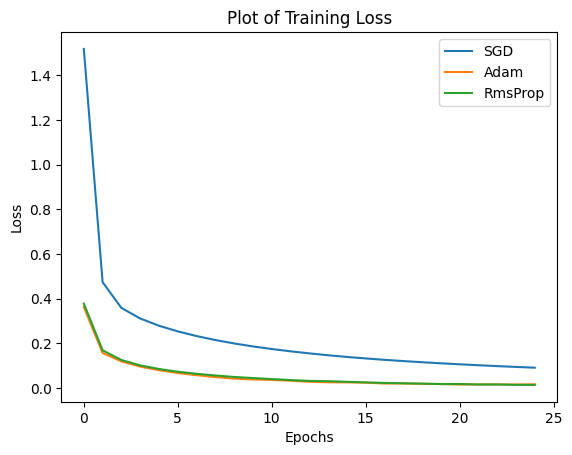

In [40]:
# plot the training loss

plt.plot(h_sgd.history['loss'], label='SGD')
plt.plot(h_adam.history['loss'], label='Adam')
plt.plot(h_rms.history['loss'], label='RmsProp')
#plt.plot(hes.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

# Exercise 

Modify the code to get a better testing accuracy.
- Change the number of hidden units
- Increase the number of hidden layers
- Use a different optimizer

In [41]:
# Change number of hidden units and increase hiddenlayers
dnnModel_ex = models.Sequential([
    layers.Input(shape=(28*28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
dnnModel_ex.summary()

# use adagrad as optimizer
dnnModel_ex.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

# train the model
dnnModel_ex.fit( Xtrain, Ytrain, epochs=25, batch_size=64, validation_split=0.1)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,978 (328.04 KB)

 Trainable params: 83,978 (328.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8172 - loss: 0.5925 - val_accuracy: 0.9623 - val_loss: 0.1276
Epoch 2/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9585 - loss: 0.1375 - val_accuracy: 0.9675 - val_loss: 0.1003
Epoch 3/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9714 - loss: 0.0944 - val_accuracy: 0.9683 - val_loss: 0.0974
Epoch 4/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9782 - loss: 0.0745 - val_accuracy: 0.9722 - val_loss: 0.0955
Epoch 5/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9817 - loss: 0.0604 - val_accuracy: 0.9733 - val_loss: 0.0888
Epoch 6/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9840 - loss: 0.0492 - val_accuracy: 0.9735 - val_loss: 0.0896
Epoch 7/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9860 - loss: 0.0440 - val_accuracy: 0.9763 - val_loss: 0.0916
Epoch 8/25
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9880 - loss: 0.0379 - val_accuracy:

In [42]:
# test the model
loss_ex, acc_ex = dnnModel_ex.evaluate( Xtest, Ytest)
print('Model Accuracy= - %.3f' % (acc_ex * 100.0))
print('Model Loss %.3f' % loss_ex)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9721 - loss: 0.1445
Model Accuracy= - 97.500
Model Loss 0.127
